<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/04_2_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AND gate 이해하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
#AND
y_data = [[0],
          [0],
          [0],
          [1]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [3]:
X = tf.placeholder(tf.float32, [None, 2]) # none-> 데이터가 몇 개가 들어올 지는 모른다. 데이터의 차원은 2
Y = tf.placeholder(tf.float32, [None, 1])

In [4]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')#입력이 2개 출력이 1
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

In [5]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [6]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))#머신러닝이 예측한 것과 정답 비교 (정답=1 오답=0 --> 평균을 낸다) 

In [7]:
sess = tf.Session()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
vcost =[]

In [10]:
for step in range(20001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0: 
        print(cost1)

0.62334
0.44742113
0.3540796
0.29561883
0.25501743
0.22480536
0.2012453
0.18225276
0.16656217
0.15335226
0.1420629
0.13229571
0.12375866
0.11623122
0.109543875
0.10356348
0.0981839
0.093319446
0.088900186
0.08486806
0.081175


Text(0.5, 0, 'epoch')

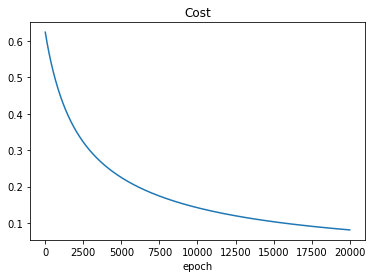

In [11]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [12]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})
print(test1[0][0]) # 대괄호 안보이도록 하기 위해 [0][0]씀

0.8735669


In [13]:
for i in range(4):
  test1 = sess.run(hypothesis, feed_dict={X:[x_data[i]]})
  print(i, x_data[i], y_data[i], "----predicted : ", test1)

0 [0. 0.] [0.] ----predicted :  [[0.00140565]]
1 [0. 1.] [0.] ----predicted :  [[0.08974095]]
2 [1. 0.] [0.] ----predicted :  [[0.08979245]]
3 [1. 1.] [1.] ----predicted :  [[0.8735669]]


[1, 1] 일 때 1과 가깝게 결과가 나옴

In [14]:
acc1 = sess.run(accuracy, feed_dict = {X: x_data, Y: y_data})
print(acc1)

1.0


In [15]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})